<a href="https://colab.research.google.com/github/muhammadanas25/Stock_trend_prediction/blob/main/knn_stock_model(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Initial imports
import pandas as pd
!pip install path
from path import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
# Initial imports
import pandas as pd
import numpy as np
from path import Path
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%pip isntall path
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()
from sklearn.decomposition import PCA
from sklearn.compose import make_column_selector as selector
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


ERROR: unknown command "isntall" - maybe you meant "install"


In [ ]:
file_path = Path("LSEG.L.csv")
df = pd.read_csv(file_path)
df.dropna(inplace=True)
df.tail()

,Date,Open,High,Low,Close,Volume,EF_1,EF_2,Oil FutureTrend,Gold FutureTrend,Trend,Twitter Sentiments,FutureTrend
753,23/06/2021,8222.0,8246.0,8098.000000,8098.0,625499,0.000000,-1.508149,Negative,Positive,Negative,0,Negative
754,24/06/2021,8132.0,8252.0,8099.475098,8182.0,559127,0.541059,0.614855,Negative,Negative,Positive,0,Negative
755,25/06/2021,8176.0,8288.0,8110.000000,8282.0,524936,0.966292,1.296477,Positive,Negative,Positive,0,Positive
756,28/06/2021,8268.0,8298.0,8126.000000,8148.0,398315,0.127907,-1.451379,Negative,Positive,Negative,0,Negative
757,29/06/2021,8132.0,8234.0,8122.000000,8168.0,439534,0.410714,0.442696,Negative,Negative,Positive,0,Positive


In [ ]:
def calculate_ema(prices, days, smoothing=2):
    ema = [sum(prices[:days]) / days]
    for price in prices[days:]:
        ema.append((price * (smoothing / (1 + days))) + ema[-1] * (1 - (smoothing / (1 + days))))
    return ema


In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,EF_1,EF_2,Oil FutureTrend,Gold FutureTrend,Trend,Twitter Sentiments,FutureTrend
0,02/07/2018,4454.0,4454.0,4375.0,4389.0,702227,0.177215,-1.459362,Positive,Negative,Negative,0,Negative
1,03/07/2018,4402.0,4457.0,4395.0,4436.0,562783,0.661290,0.772376,Neutral,Neutral,Positive,0,Negative
2,04/07/2018,4419.0,4488.0,4402.0,4478.0,264953,0.883721,1.335144,Neutral,Neutral,Positive,0,Positive
3,05/07/2018,4485.0,4494.0,4456.0,4459.0,888962,0.078947,-0.579710,Negative,Positive,Negative,0,Negative
4,06/07/2018,4479.0,4503.0,4446.0,4497.0,714220,0.894737,0.401875,Negative,Negative,Positive,0,Negative


In [ ]:
target=df['FutureTrend']
df=df.drop("FutureTrend",axis =1)
target= target.replace(['Negative','Positive',  'Neutral'],[0,1,2])
df['ema5'] = df['Close'] / df['Close'].ewm(5).mean()
# df['normVol'] = df['Volume'] / df['Volume'].ewm(5).mean()   
df['diff']=df['Open']-df['Close']
df['ema5'] = df['Close'] / df['Close'].ewm(5).mean()
# df['normVol'] = df['Volume'] / df['Volume'].ewm(5).mean()   
df['diff']=df['Open']-df['Close']


ema = calculate_ema(df['Close'], 10)
df=df[9:]
target=target[9:]
df['ema']=ema
df['signal']=df['ema']>df['Close']

del (df['Open'])
del (df['Close'])

df.head()

,Date,High,Low,Volume,EF_1,EF_2,Oil FutureTrend,Gold FutureTrend,Trend,Twitter Sentiments,ema5,diff,ema,signal
9,13/07/2018,4580.0,4520.0,538587,0.000000,-0.418594,Positive,Positive,Negative,0,1.005739,19.000000,4478.800000,False
10,16/07/2018,4531.0,4468.0,475379,0.328575,-0.604513,Negative,Positive,Negative,0,0.999010,27.299805,4480.600035,False
11,17/07/2018,4516.0,4470.0,525162,0.652174,0.379210,Negative,Negative,Positive,0,1.001239,-17.000000,4484.127302,False
12,18/07/2018,4562.0,4498.0,874221,0.781250,1.021768,Negative,Positive,Positive,0,1.009706,-46.000000,4495.740520,False
13,19/07/2018,4607.0,4544.0,1205416,0.380952,0.329453,Negative,Negative,Positive,0,1.011560,-15.000000,4508.878607,False


In [ ]:
new_df=df
new_df= df.set_index("Date")

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)
numerical_columns = numerical_columns_selector(new_df)
categorical_columns = categorical_columns_selector(new_df)
print(categorical_columns)

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard-scaler', numerical_preprocessor, numerical_columns)])
X_train,X_test, y_train, y_test = train_test_split(new_df, target, test_size=0.2, random_state=4)
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.fit_transform(X_test)
pca = PCA(n_components=7)
# prepare transform on dataset
pca.fit(X_train)
# apply transform to dataset
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

model.fit(X_train,y_train)

['Oil FutureTrend', 'Gold FutureTrend', 'Trend']


KNeighborsClassifier()

In [ ]:
print("Accuracy score (training): {0:.3f}".format(
    model.score(
        X_train, 
        y_train)))
print("Accuracy score (validation): {0:.3f}".format(
    model.score(
        X_test, 
        y_test)))

Accuracy score (training): 0.681
Accuracy score (validation): 0.547


In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

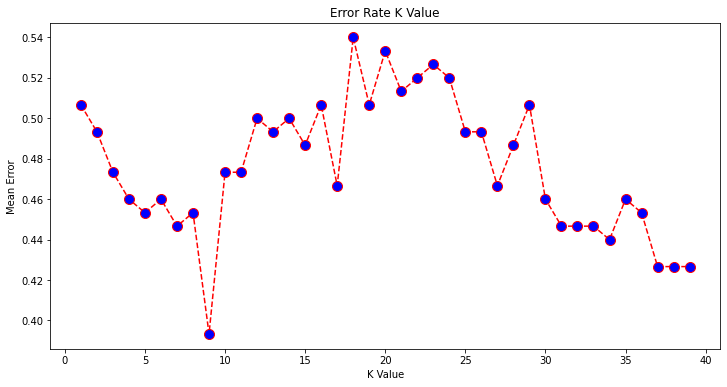

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


In [ ]:

model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train, y_train)

model.fit(X_train,y_train)
print("Accuracy score (training): {0:.3f}".format(
    model.score(
        X_train, 
        y_train)))
print("Accuracy score (validation): {0:.3f}".format(
    model.score(
        X_test, 
        y_test)))

Accuracy score (training): 0.603
Accuracy score (validation): 0.513
